In [1]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np

#for NLP
import itertools
import nltk
from nltk.corpus import stopwords
import re
import collections

#specialized plots
import squarify
import plotly.express as px

#geoprocessing
import geopandas as gpd
import geopy

%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
#read in twitter data
tw = pd.read_csv('twitter.csv')
tw.head(20)

id        time           created_at   from_user_name  \
0   1225314274983190529  1580972663  2020-02-06 07:04:23       agathardlp   
1   1225314561596809217  1580972731  2020-02-06 07:05:31       agathardlp   
2   1225317676748169216  1580973474  2020-02-06 07:17:54         dikanind   
3   1225317776065208320  1580973497  2020-02-06 07:18:17       skenxxieco   
4   1225317911419486210  1580973530  2020-02-06 07:18:50     markieemarxh   
5   1225318065249718274  1580973566  2020-02-06 07:19:26         ayk_dxix   
6   1225318355025817600  1580973635  2020-02-06 07:20:35     saggyarmpitt   
7   1225318560936779777  1580973684  2020-02-06 07:21:24      itspauly213   
8   1225318968593965056  1580973782  2020-02-06 07:23:02    ShaolinIvains   
9   1225318981063585792  1580973785  2020-02-06 07:23:05       spammy3245   
10  1225319632669728768  1580973940  2020-02-06 07:25:40  PrincessArmani0   
11  1225319668690362371  1580973949  2020-02-06 07:25:49         iimshade   
12  1225319746125451264  1580973967  2020-02-06 07:26:07       jsbustaman   
13  1225319858906202112  1580973994  2020-02-06 07:26:34  ZLnewsandvideos   
14  1225320072614490112  1580974045  2020-02-06 07:27:25  MikeSch95954709   
15  1225320234124562433  1580974083  2020-02-06 07:28:03         koobimin   
16  1225320241854472192  1580974085  2020-02-06 07:28:05       CAAChennai   
17  1225320268488486912  1580974092  2020-02-06 07:28:12       Richidoe13   
18  1225320601625100288  1580974171  2020-02-06 07:29:31         koobimin   
19  1225320787546116107  1580974215  2020-02-06 07:30:15         gettup10   

                                                 text filter_level  \
0   RT @ParaTiOnline: La diseñadora Agatha Ruiz de...         none   
1   RT @ParaTiOnline: La diseñadora Agatha Ruiz de...         none   
2   RT @MensHumor: Fashion Week has truly risen to...         none   
3   RT @BoF: Fashion month is upon us. But what do...         none   
4   RT @miloismybaby: Mark was supposed to attend ...         none   
5   RT @DaikiTsuneta: ✖️ N.HOOLYWOOD  ㅤ New York F...         none   
6   RT @Ninja: To walk a stage during New York fas...         none   
7   RT @ComplexSneakers: Nike does Fashion Week di...         none   
8   RT @ComplexSneakers: Nike does Fashion Week di...         none   
9   RT @Ninja: To walk a stage during New York fas...         none   
10  RT @_hxtr: 🚨🚨COTTON CLUB WEEK IS HERE! The 202...         none   
11  RT @Ninja: To walk a stage during New York fas...         none   
12  RT @enews: Tune in to E! for Everything New Yo...         none   
13  After having been back in Sweden for a little ...         none   
14  RT @enews: Tune in to E! for Everything New Yo...         none   
15  RT @ZLnewsandvideos: After having been back in...         none   
16  South India's biggest garment fair is here! Fa...         none   
17  RT @Ninja: To walk a stage during New York fas...         none   
18  zara attending paris and new york fashion week...         none   
19  RT @iamcardib: PARIS FASHION WEEK, IM HERE ! h...         none   

    possibly_sensitive  withheld_copyright  withheld_scope  truncated  \
0                  NaN                 NaN             NaN        NaN   
1                  NaN                 NaN             NaN        NaN   
2                  NaN                 NaN             NaN        NaN   
3                  0.0                 NaN             NaN        NaN   
4                  NaN                 NaN             NaN        NaN   
5                  NaN                 NaN             NaN        NaN   
6                  NaN                 NaN             NaN        NaN   
7                  0.0                 NaN             NaN        NaN   
8                  0.0                 NaN             NaN        NaN   
9                  NaN                 NaN             NaN        NaN   
10                 NaN                 NaN             NaN        NaN   
11                 NaN                 NaN             N

In [181]:
#see how many are null/what we should get rid of
tw.isna().sum()

id                                  0
time                                0
created_at                          0
from_user_name                      0
text                                0
filter_level                        0
possibly_sensitive             312281
withheld_copyright             607755
withheld_scope                 607755
truncated                      607755
retweet_count                       0
favorite_count                      0
lang                                0
to_user_name                   588122
in_reply_to_status_id          589683
quoted_status_id               585548
source                              0
location                       269260
lat                            605553
lng                            605553
from_user_id                        0
from_user_realname                 16
from_user_verified                  0
from_user_description          101058
from_user_url                  436311
from_user_profile_image_url         0
from_user_ut

In [3]:
#get rid of unnecessary columns
twe = tw.drop(['withheld_copyright', 'withheld_scope', 'truncated', 'to_user_name', 'in_reply_to_status_id', 'quoted_status_id', 'lat', 'lng', 'from_user_utcoffset', 'from_user_timezone', 'from_user_lang', 'from_user_withheld_scope','urls', 'urls_expanded', 'urls_followed', 'domains', 'HTTP status code'],axis = 1)

In [4]:
#read in language codes used in the twitter data set to convert 2 letter code to language
lang = pd.read_csv('language-codes_csv.csv')
lang.head()

alpha2    English
0     aa       Afar
1     ab  Abkhazian
2     ae    Avestan
3     af  Afrikaans
4     ak       Akan

In [5]:
#read in other twitter dataset collected by hashtag
twhash = pd.read_csv('twhash.csv')

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning:

Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.



In [6]:
#drop columns so that we match the two datasets
twhash.drop(['withheld_copyright', 'withheld_scope', 'truncated', 'to_user_name', 'in_reply_to_status_id', 'quoted_status_id', 'lat', 'lng', 'from_user_utcoffset', 'from_user_timezone', 'from_user_lang', 'from_user_withheld_scope'],axis = 1, inplace = True)

In [7]:
#create one larger twitter dataset
twittot = pd.concat([twe, twhash])

In [8]:
# get the language counts through a merge
twlangtot = twittot.merge(lang, left_on = 'lang', right_on = 'alpha2', how = 'outer')
twlangtot.English.value_counts()[:20]

English                    1303791
Thai                         80892
French                       46263
Japanese                     41208
Korean                       36376
Spanish; Castilian           28697
Italian                      20067
Portuguese                   16096
German                        9042
Polish                        7487
Turkish                       3676
Tagalog                       3519
Haitian; Haitian Creole       2523
Estonian                      2075
Danish                        1712
Swedish                       1596
Arabic                        1545
Dutch; Flemish                1507
Catalan; Valencian            1376
Hungarian                     1264
Name: English, dtype: int64

In [9]:
#language counts for our plot
langcounttot = twlangtot.English.value_counts()[:20]

In [10]:
#location counts to plot
loccounttot = twlangtot.location.value_counts()[:50]

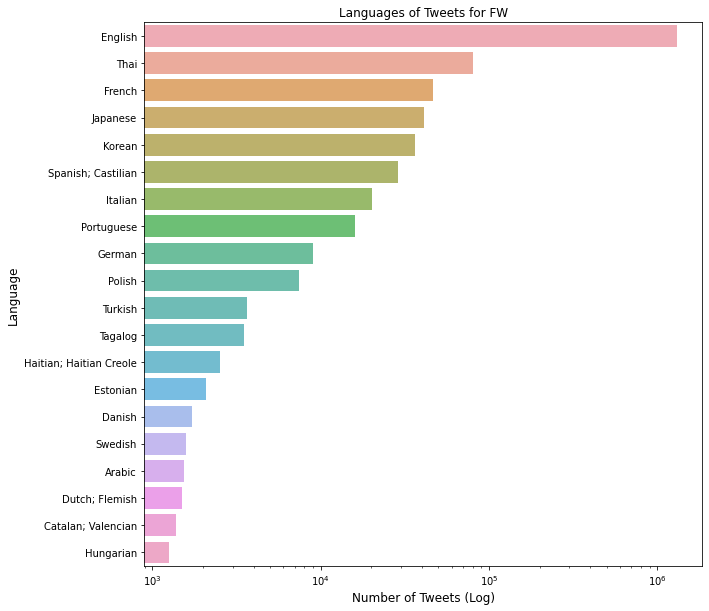

In [11]:
#plot the language counts on log scale
plt.figure(figsize=(10,10))
s = sns.barplot(langcounttot.values, langcounttot.index, alpha=0.8)
s.set_xscale('log') 
plt.title('Languages of Tweets for FW')
plt.ylabel('Language', fontsize=12)
plt.xlabel('Number of Tweets (Log)', fontsize=12)
plt.savefig("langtot.png")
plt.show()

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3611 missing from current font.

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3619 missing from current font.

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3632 missing from current font.

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3648 missing from current font.

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3607 missing from current font.

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 3624 missing from current font.

/Users/johnhughes/miniconda3/lib/python3.6/site-packages/matplotlib/backends/backe

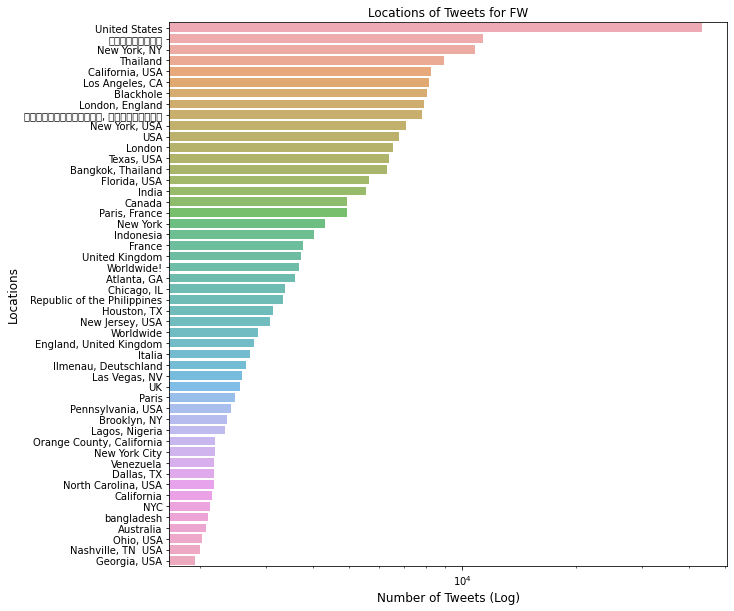

In [12]:
#plot locations on log scale
plt.figure(figsize=(10,10))
s = sns.barplot(loccounttot.values, loccounttot.index, alpha=0.8)
s.set_xscale('log') 
plt.title('Locations of Tweets for FW')
plt.ylabel('Locations', fontsize=12)
plt.xlabel('Number of Tweets (Log)', fontsize=12)
plt.savefig("locationtotal.png")
plt.show()

In [13]:
#get the days for each tweet to isolate during FW
twlangtot['created_at'] = pd.to_datetime(twlangtot['created_at'])
twlangtot['day'] = twlangtot['created_at'].dt.day

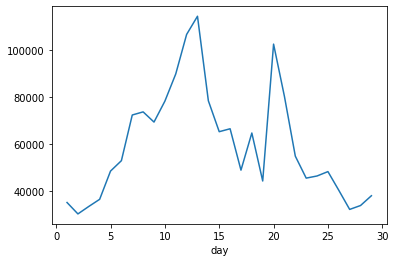

In [14]:
#all tweets by day
twlangtot.groupby(['day'])['id'].count().plot()

In [15]:
#Isolate the top languages
thai = twlangtot[twlangtot['English'] == 'Thai']
french = twlangtot[twlangtot['English'] == 'French']
japanese = twlangtot[twlangtot['English'] == 'Japanese']
korean = twlangtot[twlangtot['English'] == 'Korean']
spanish = twlangtot[twlangtot['English'] == 'Spanish; Castilian']
italian = twlangtot[twlangtot['English'] == 'Italian']
port = twlangtot[twlangtot['English'] == 'Portuguese']
tag = twlangtot[twlangtot['English'] == 'Tagalog']
english = twlangtot[twlangtot['English'] == 'English']

In [16]:
#tweets in each language by the day
thai_day = thai.groupby(['day'])['id'].count()
italian_day = italian.groupby(['day'])['id'].count()
english_day = english.groupby(['day'])['id'].count()
french_day = french.groupby(['day'])['id'].count()
spanish_day = spanish.groupby(['day'])['id'].count()
port_day = port.groupby(['day'])['id'].count()
japanese_day = japanese.groupby(['day'])['id'].count()
korean_day = korean.groupby(['day'])['id'].count()


In [155]:
#get csvs for external use
thai_day.to_csv('thai_day.csv')
italian_day.to_csv('italian_day.csv')
english_day.to_csv('english_day.csv')
french_day.to_csv('french_day.csv')
spanish_day.to_csv('spanish_day.csv')
port_day.to_csv('port_day.csv')
japanese_day.to_csv('japanese_day.csv')
korean_day.to_csv('korean_day.csv')

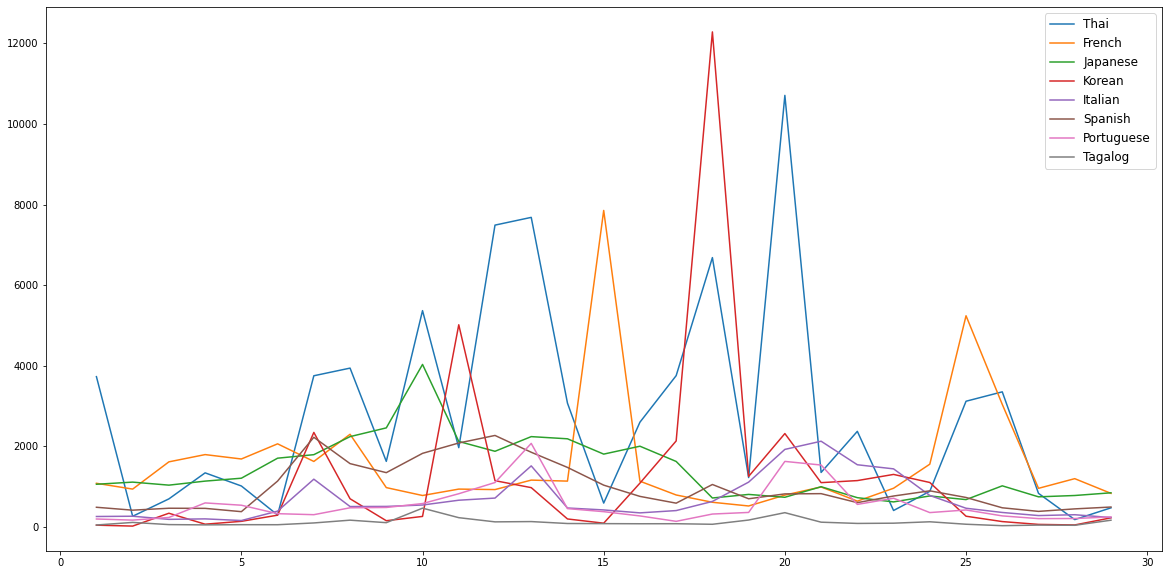

In [17]:
#compare languages by the day, exclude english as it overwhelms the graph
plt.figure(figsize = [20,10])
plt.plot(thai.groupby(['day'])['id'].count())
plt.plot(french.groupby(['day'])['id'].count())
plt.plot(japanese.groupby(['day'])['id'].count())
plt.plot(korean.groupby(['day'])['id'].count())
plt.plot(italian.groupby(['day'])['id'].count())
plt.plot(spanish.groupby(['day'])['id'].count())
plt.plot(port.groupby(['day'])['id'].count())
plt.plot(tag.groupby(['day'])['id'].count())
plt.legend(['Thai', 'French', 'Japanese', 'Korean', 'Italian', 'Spanish', 'Portuguese', 'Tagalog'], fontsize = 'large')

Text(0.5, 1.0, 'English')

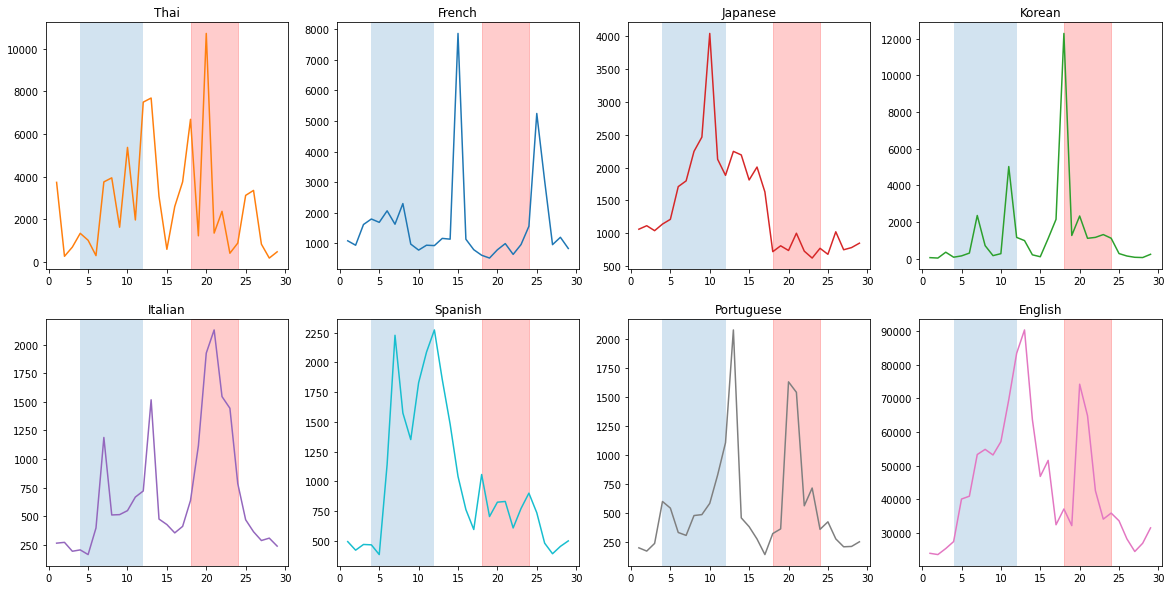

In [18]:
#same info but in subplots for each language, NYFW is blue, MFW is Red

fig, axs = plt.subplots(2, 4, figsize=(20,10))

axs[0, 0].plot(thai.groupby(['day'])['id'].count(), 'tab:orange')
axs[0, 0].axvspan(4, 12, alpha = 0.2)
axs[0, 0].axvspan(18, 24, color = 'r', alpha = 0.2)
#axs[0, 0].axvline(x = 12, linestyle = '--')
#axs[0, 0].axvline(x = 18, linestyle = '--', c = 'r')
#axs[0, 0].axvline(x = 24, linestyle = '--', c = 'r')
axs[0, 0].set_title('Thai')

axs[0, 1].plot(french.groupby(['day'])['id'].count(), 'tab:blue')
axs[0, 1].axvspan(4, 12, alpha = 0.2)
axs[0, 1].axvspan(18, 24, color = 'r', alpha = 0.2)
axs[0, 1].set_title('French')

axs[0, 2].plot(japanese.groupby(['day'])['id'].count(), 'tab:red')
axs[0, 2].axvspan(4, 12, alpha = 0.2)
axs[0, 2].axvspan(18, 24, color = 'r', alpha = 0.2)
axs[0, 2].set_title('Japanese')

axs[0, 3].plot(korean.groupby(['day'])['id'].count(), 'tab:green')
axs[0, 3].axvspan(4, 12, alpha = 0.2)
axs[0, 3].axvspan(18, 24, color = 'r', alpha = 0.2)
axs[0, 3].set_title('Korean')

axs[1, 0].plot(italian.groupby(['day'])['id'].count(), 'tab:purple')
axs[1, 0].axvspan(4, 12, alpha = 0.2)
axs[1, 0].axvspan(18, 24, color = 'r', alpha = 0.2)
axs[1, 0].set_title('Italian')

axs[1, 1].plot(spanish.groupby(['day'])['id'].count(), 'tab:cyan')
axs[1, 1].axvspan(4, 12, alpha = 0.2)
axs[1, 1].axvspan(18, 24, color = 'r', alpha = 0.2)
axs[1, 1].set_title('Spanish')

axs[1, 2].plot(port.groupby(['day'])['id'].count(), 'tab:gray')
axs[1, 2].axvspan(4, 12, alpha = 0.2)
axs[1, 2].axvspan(18, 24, color = 'r', alpha = 0.2)
axs[1, 2].set_title('Portuguese')

axs[1, 3].plot(english.groupby(['day'])['id'].count(), 'tab:pink')
axs[1, 3].axvspan(4, 12, alpha = 0.2)
axs[1, 3].axvspan(18, 24, color = 'r', alpha = 0.2)
axs[1, 3].set_title('English')

I think this might be useful in terms of community too, just seeing if around a specific brand there’s been interaction in some particular language, and if this is a community, and why

In [19]:
#read in Brands data
mibrands = pd.read_csv('MIFW.csv', delimiter = ';')
nybrands = pd.read_csv('NYFW.csv', delimiter = ';')

In [41]:
mibrands.head()

BRAND     DAY   HOUR  \
0  GILBERTO CALZOLARI  19-feb  09:30   
1     MARCO RAMBALDI   19-feb  10:30   
2          CALCATERRA  19-feb  11:30   
3           ULTRÀCHIC  19-feb  12:30   
4     ARTHUR ARBESSER  19-feb  14:00   

                                          LOCATION  \
0  VIA DELLA LIBERAZIONE ANG. VIA MELCHIORRE GIOIA   
1                                   VIA TURATI, 34   
2                             VIA SAN GREGORIO, 29   
3                 PIAZZA DUOMO - SCALONE ARENGARIO   
4                     VIA GAUDENZIO FANTOLI, 15/1I   

                    INSTAGRAM                          NOTE          TWITTER  
0  gilbertocalzolari_official                           NaN     GilCalzolari  
1              marcorambaldi_                           NaN              NaN  
2                 calcaterrad                           NaN              NaN  
3          ultrachic_official                           NaN  ultrachicmilano  
4              arthurarbesser  fuori dalla circonvallazione              NaN

In [38]:
nybrands.head()

Brand     Day     Hour                             Location  \
0            MONSE   07-feb  6:00 PM                       30 Wall Street   
1          TOM FORD  07-feb      NaN                          Los Angeles   
2       RAG & BONE   07-feb  7:00 PM                       Skylight Vesey   
3        PRISCAVERA  07-feb  9:00 PM                                  NaN   
4  BRANDON MAXWELL   08-feb  8:00 PM  American Museum of Natural History    

        Instagram         Twitter  
0     monsemaison             NaN  
1         tomford         TOMFORD  
2      ragandbone        rag_bone  
3      priscavera             NaN  
4  brandonmaxwell  Brandonmaxwell

In [20]:
#drop unnecessary columns
nybrands.drop(['Num'], axis = 1, inplace = True)
mibrands.drop(['NOTE'], axis = 1, inplace = True)

In [21]:
#get the same column names
mibrands = mibrands.rename(columns = {'BRAND':'Brand', 'DAY':'Day', 'HOUR':'Hour', 'LOCATION':'Location', 'INSTAGRAM':'Instagram', 'TWITTER':'Twitter'})

In [156]:
#export for external use
nybrands.to_csv('nybrands.csv')
mibrands.to_csv('milanbrands.csv')

In [22]:
#create one brands dataset
brands = pd.concat([nybrands, mibrands])

In [46]:
brands.head()

Brand     Day     Hour                             Location  \
0            MONSE   07-feb  6:00 PM                       30 Wall Street   
1          TOM FORD  07-feb      NaN                          Los Angeles   
2       RAG & BONE   07-feb  7:00 PM                       Skylight Vesey   
3        PRISCAVERA  07-feb  9:00 PM                                  NaN   
4  BRANDON MAXWELL   08-feb  8:00 PM  American Museum of Natural History    

        Instagram         Twitter  
0     monsemaison             NaN  
1         tomford         TOMFORD  
2      ragandbone        rag_bone  
3      priscavera             NaN  
4  brandonmaxwell  Brandonmaxwell

In [47]:
brands.isna().sum()

Brand        104
Day          104
Hour         105
Location     149
Instagram    104
Twitter      139
dtype: int64

In [23]:
#clear out random empty rows
brands.dropna(subset = ["Brand"], inplace=True)

In [24]:
#get list of brands twitter handle
twbrands = brands.Twitter

In [25]:
twbrands.dropna(inplace = True)

In [90]:
twbrands.head()

1           TOMFORD
2          rag_bone
4    Brandonmaxwell
5    BadgleyMischka
9        snowxuegao
Name: Twitter, dtype: object

In [26]:
#create lowercase to standardize
brands_lw = [brand.lower() for brand in twbrands]

In [27]:
#turn thsi into a set
brandset = set(brands_lw)

In [82]:
brandset

{'_selfportrait_',
 'adamlippes',
 'agnonaofficial',
 'albertaferretti',
 'alexandramoura',
 'aliceandolivia',
 'anitacividini',
 'annakikiworld',
 'annasui',
 'anteprima_world',
 'area_nyc_',
 'armani',
 'atsu_nakashima',
 'badgleymischka',
 'bibhumohapatra',
 'bottegaveneta',
 'brandonmaxwell',
 'brockcollection',
 'christiancowan',
 'chromat_party',
 'coach',
 'cynthia_rowley',
 'dennisbasso',
 'eckhaus_latta',
 'emporioarmani',
 'ermannoscervino',
 'etroofficial',
 'fendi',
 'fenoelofficial',
 'ferragamo',
 'filausa                       fila_korea',
 'frankiemorello',
 'gabrielahearst',
 'gcdswear',
 'gilcalzolari',
 'gucci',
 'hellessyny',
 'helmutlang',
 'houseofherrera',
 'hugoboss',
 'jasonwu',
 'jilsanderpr',
 'jonathancohenstudio',
 'jonathansimkhai',
 'katespadeny',
 'khaite_ny',
 'kimshuistudio',
 'laquansmith',
 'lbofficialpage',
 'lela_rose',
 'longchamp',
 'luisabeccaria',
 'marchesafashion',
 'marcjacobs',
 'marniofficial',
 'maxmara',
 'michaelkors',
 'missoni',
 'mon

In [28]:
#clean the mentions column
twlangtot['ment'] = twlangtot['mentions'].str.split(';')

In [29]:
#context of a tweet
text = twlangtot.text

In [30]:
#function to remove url from tweets
def remove_url(txt):

    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(txt)).split())

In [31]:
#apply above function to our tweets
all_tweets = [remove_url(tweet) for tweet in text]
all_tweets[:5]

['RT ParaTiOnline La diseadora Agatha Ruiz de la Prada present una coleccin moderna y llena de color en el Fashion Week de Madrid Te la mostramos en esta nota agatharuizdelaprada madrid mfw 7',
 'RT ParaTiOnline La diseadora Agatha Ruiz de la Prada present una coleccin moderna y llena de color en el Fashion Week de Madrid Te la mostramos en esta nota agatharuizdelaprada madrid mfw 1',
 'Nos os perdis hasta el da 9 la SFWMadrid en un espacio diferente talentgardenes Sustainable Fashion Week abre la puerta al trabajo de grandes marcas de ropa que a la vez luchan contra el cambio climtico Da 9 en alcorcon un queenupcycling a cargo de AltrapoLAB',
 'RT nurialamuniz Nos os perdis hasta el da 9 la SFWMadrid en un espacio diferente talentgardenes Sustainable Fashion Week abre la puerta al trabajo de grandes marcas de ropa que a la vez luchan contra el cambio climtico Da 9 en alcorcon un queenupcycling a cargo de AltrapoLAB',
 'RT PEFCSpain De esto disfrutaremos en la Sustainable Fashion Week 

In [32]:
#split the tweet into individual words
words = [tweet.lower().split() for tweet in all_tweets]
words[:2]

[['rt',
  'parationline',
  'la',
  'diseadora',
  'agatha',
  'ruiz',
  'de',
  'la',
  'prada',
  'present',
  'una',
  'coleccin',
  'moderna',
  'y',
  'llena',
  'de',
  'color',
  'en',
  'el',
  'fashion',
  'week',
  'de',
  'madrid',
  'te',
  'la',
  'mostramos',
  'en',
  'esta',
  'nota',
  'agatharuizdelaprada',
  'madrid',
  'mfw',
  '7'],
 ['rt',
  'parationline',
  'la',
  'diseadora',
  'agatha',
  'ruiz',
  'de',
  'la',
  'prada',
  'present',
  'una',
  'coleccin',
  'moderna',
  'y',
  'llena',
  'de',
  'color',
  'en',
  'el',
  'fashion',
  'week',
  'de',
  'madrid',
  'te',
  'la',
  'mostramos',
  'en',
  'esta',
  'nota',
  'agatharuizdelaprada',
  'madrid',
  'mfw',
  '1']]

In [33]:
# List of all words across tweets
all_words = list(itertools.chain(*words))

# Create counter to count these top words
word_counts = collections.Counter(all_words)

word_counts.most_common(15)

[('fashion', 1354484),
 ('rt', 991740),
 ('the', 785921),
 ('to', 602379),
 ('style', 532704),
 ('week', 502932),
 ('on', 444874),
 ('i', 393176),
 ('out', 357199),
 ('all', 347459),
 ('so', 342465),
 ('check', 335440),
 ('im', 334764),
 ('good', 331429),
 ('share', 320583)]

In [34]:
#put this info into a DataFrame
clean_tweets = pd.DataFrame(word_counts.most_common(500),
                             columns=['words', 'count'])

clean_tweets.head()

words    count
0  fashion  1354484
1       rt   991740
2      the   785921
3       to   602379
4    style   532704

In [35]:
#get stopwords for NLP form nltk toolkit
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johnhughes/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
#peek at the stop words
stop_words = set(stopwords.words('english'))

list(stop_words)[0:10]

['in',
 'hers',
 'him',
 'just',
 'off',
 'from',
 'your',
 'than',
 'before',
 'herself']

In [37]:
# Remove stop words from each tweet list of words
tweets_nsw = [[word for word in tweet_words if not word in stop_words]
              for tweet_words in words]

tweets_nsw[0]

['rt',
 'parationline',
 'la',
 'diseadora',
 'agatha',
 'ruiz',
 'de',
 'la',
 'prada',
 'present',
 'una',
 'coleccin',
 'moderna',
 'llena',
 'de',
 'color',
 'en',
 'el',
 'fashion',
 'week',
 'de',
 'madrid',
 'te',
 'la',
 'mostramos',
 'en',
 'esta',
 'nota',
 'agatharuizdelaprada',
 'madrid',
 'mfw',
 '7']

In [38]:
#get most common words without stopwords
all_words_nsw = list(itertools.chain(*tweets_nsw))

counts_nsw = collections.Counter(all_words_nsw)

counts_nsw.most_common(15)

[('fashion', 1354484),
 ('rt', 991740),
 ('style', 532704),
 ('week', 502932),
 ('check', 335440),
 ('im', 334764),
 ('good', 331429),
 ('share', 320583),
 ('items', 317714),
 ('poshmark', 316561),
 ('loving', 316025),
 ('shopmycloset', 315306),
 ('poshmarkapp', 314818),
 ('nyfw', 204550),
 ('show', 182227)]

In [39]:
#turn these into DF
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(10000),
                             columns=['words', 'count'])

In [58]:
clean_tweets_nsw.iloc[15:35, :]

words   count
15             2020  166793
16             lisa  154413
17              new  146788
18            milan  144626
19              mfw  136041
20             york   98500
21            paris   94557
22        blackpink   88120
23             love   83906
24            prada   83076
25  ygofficialblink   71098
26        loungefly   68806
27    originalfunko   68563
28           beauty   66607
29            coach   65293
30           runway   64355
31               de   59572
32           follow   58916
33             look   55743
34               la   54248

In [40]:
#see how many brands are in the set and the count for each one
cln = clean_tweets_nsw[clean_tweets_nsw['words'].isin(brandset)]

In [59]:
cln.shape

(41, 2)

In [41]:
#same as above but separated for Thai language tweets
thai_tweets = [remove_url(tweet) for tweet in thai.text]

thaiwords = [tweet.lower().split() for tweet in thai_tweets]

# List of all words across tweets
thai_words = list(itertools.chain(*thaiwords))

thai_counts = collections.Counter(thai_words)

thai_tweets = pd.DataFrame(thai_counts.most_common(10000),
                             columns=['words', 'count'])

clean_thai = thai_tweets[thai_tweets['words'].isin(brandset)]

clean_thai.shape

(14, 2)

In [42]:
#for english tweets
english_tweets = [remove_url(tweet) for tweet in english.text]

englishwords = [tweet.lower().split() for tweet in english_tweets]

# List of all words across tweets
english_words = list(itertools.chain(*englishwords))

# Create counter
english_counts = collections.Counter(english_words)

english_tweets = pd.DataFrame(english_counts.most_common(10000),
                             columns=['words', 'count'])

clean_english = english_tweets[english_tweets['words'].isin(brandset)]

clean_english.shape

(44, 2)

In [43]:
#brands for french tweets
french_tweets = [remove_url(tweet) for tweet in french.text]

frenchwords = [tweet.lower().split() for tweet in french_tweets]

# List of all words across tweets
french_words = list(itertools.chain(*frenchwords))

french_counts = collections.Counter(french_words)

french_tweets = pd.DataFrame(french_counts.most_common(10000),
                             columns=['words', 'count'])

clean_french = french_tweets[french_tweets['words'].isin(brandset)]

clean_french.shape

(19, 2)

In [44]:
#brands for italian tweets
italian_tweets = [remove_url(tweet) for tweet in italian.text]

italianwords = [tweet.lower().split() for tweet in italian_tweets]

# List of all words across tweets
italian_words = list(itertools.chain(*italianwords))

italian_counts = collections.Counter(italian_words)

italian_tweets = pd.DataFrame(italian_counts.most_common(10000),
                             columns=['words', 'count'])

clean_italian = italian_tweets[italian_tweets['words'].isin(brandset)]

clean_italian.shape

(37, 2)

In [45]:
#brands for japanese tweets
japanese_tweets = [remove_url(tweet) for tweet in japanese.text]

japanesewords = [tweet.lower().split() for tweet in japanese_tweets]

# List of all words across tweets
japanese_words = list(itertools.chain(*japanesewords))

japanese_counts = collections.Counter(japanese_words)

japanese_tweets = pd.DataFrame(japanese_counts.most_common(10000),
                             columns=['words', 'count'])

clean_japanese = japanese_tweets[japanese_tweets['words'].isin(brandset)]

clean_japanese.shape

(22, 2)

In [46]:
#brands for korean tweets
korean_tweets = [remove_url(tweet) for tweet in korean.text]

koreanwords = [tweet.lower().split() for tweet in korean_tweets]

# List of all words across tweets
korean_words = list(itertools.chain(*koreanwords))

korean_counts = collections.Counter(korean_words)

korean_tweets = pd.DataFrame(korean_counts.most_common(10000),
                             columns=['words', 'count'])

clean_korean = korean_tweets[korean_tweets['words'].isin(brandset)]

clean_korean.shape

(9, 2)

In [47]:
#brands for spanish tweets
spanish_tweets = [remove_url(tweet) for tweet in spanish.text]

spanishwords = [tweet.lower().split() for tweet in spanish_tweets]

# List of all words across tweets
spanish_words = list(itertools.chain(*spanishwords))

spanish_counts = collections.Counter(spanish_words)

spanish_tweets = pd.DataFrame(spanish_counts.most_common(10000),
                             columns=['words', 'count'])

clean_spanish = spanish_tweets[spanish_tweets['words'].isin(brandset)]

clean_spanish.shape

(30, 2)

In [48]:
#brands for portuguese tweets
port_tweets = [remove_url(tweet) for tweet in port.text]

portwords = [tweet.lower().split() for tweet in port_tweets]

# List of all words across tweets
port_words = list(itertools.chain(*portwords))

port_counts = collections.Counter(port_words)

port_tweets = pd.DataFrame(port_counts.most_common(10000),
                             columns=['words', 'count'])

clean_port = port_tweets[port_tweets['words'].isin(brandset)]

clean_port.shape

(21, 2)

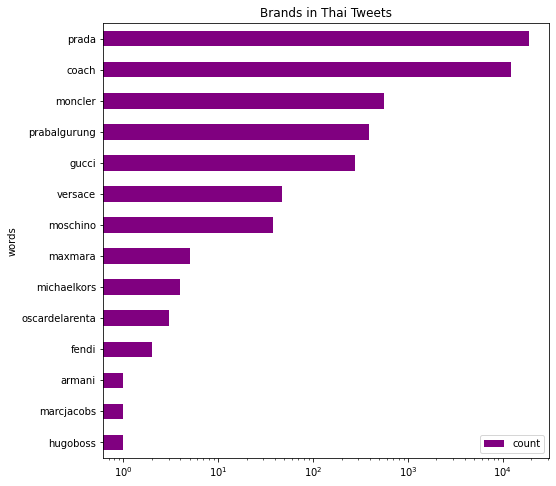

In [49]:
#plot the most popular brands for each language
fig, ax = plt.subplots(figsize=(8, 8))

#horizontal bar graph
clean_thai.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in Thai Tweets")
ax.set_xscale('log')

plt.show()

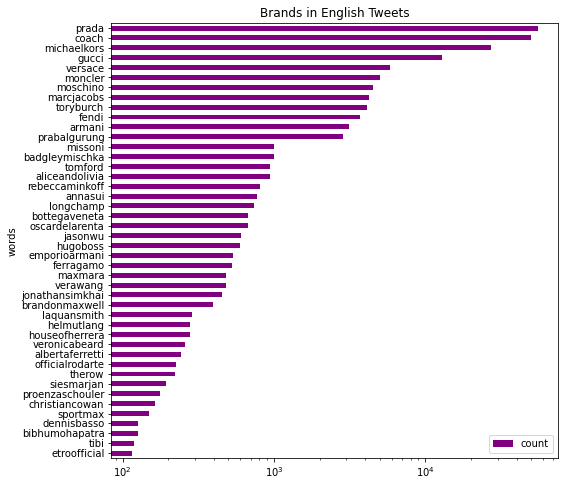

In [50]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
clean_english.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in English Tweets")
ax.set_xscale('log')

plt.show()

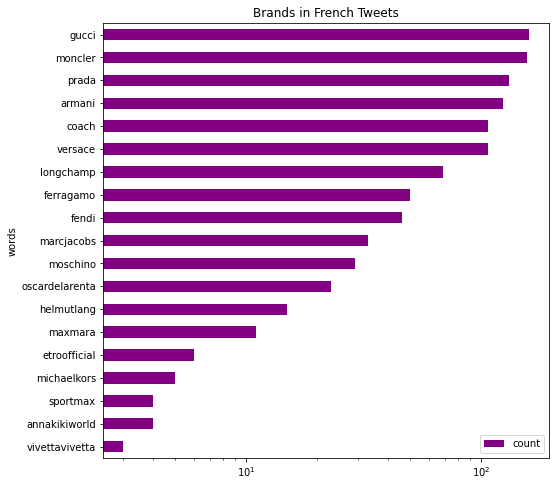

In [51]:
fig, ax = plt.subplots(figsize=(8, 8))

# horizontal bar graph
clean_french.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in French Tweets")
ax.set_xscale('log')

plt.show()

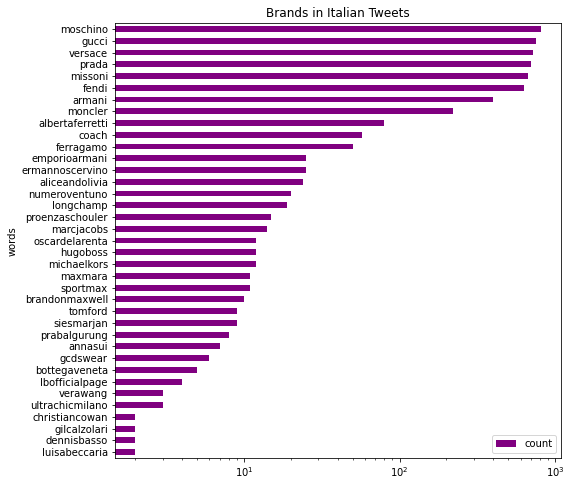

In [52]:
fig, ax = plt.subplots(figsize=(8, 8))

# horizontal bar graph
clean_italian.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in Italian Tweets")
ax.set_xscale('log')

plt.show()

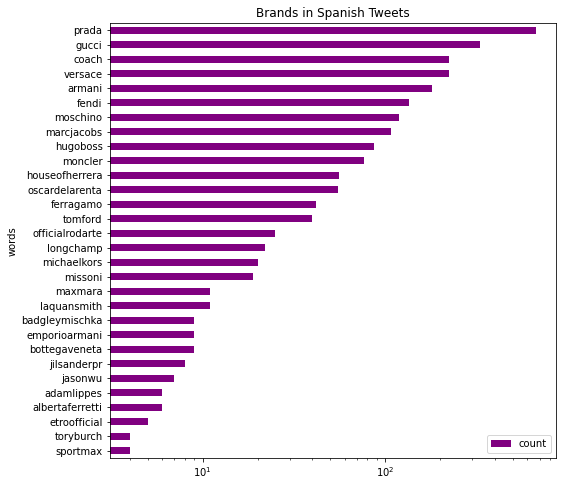

In [53]:
fig, ax = plt.subplots(figsize=(8, 8))

# horizontal bar graph
clean_spanish.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in Spanish Tweets")
ax.set_xscale('log')

plt.show()

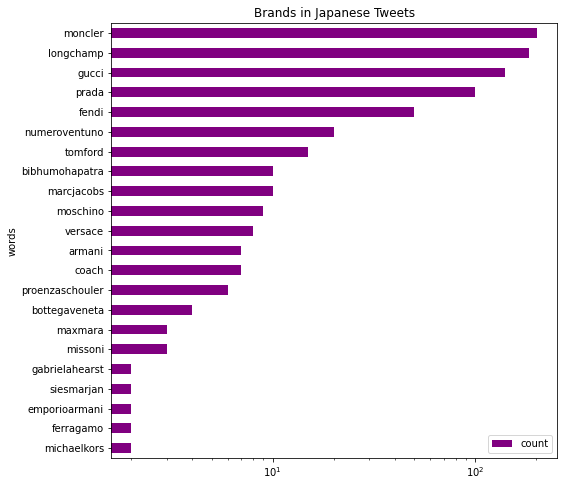

In [54]:
fig, ax = plt.subplots(figsize=(8, 8))

# horizontal bar graph
clean_japanese.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in Japanese Tweets")
ax.set_xscale('log')

plt.show()

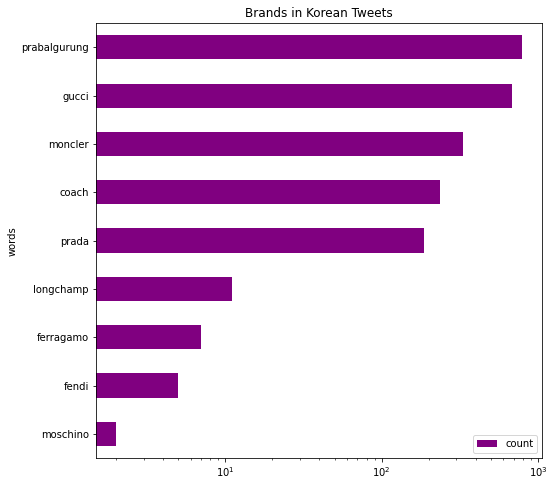

In [55]:
fig, ax = plt.subplots(figsize=(8, 8))

# horizontal bar graph
clean_korean.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in Korean Tweets")
ax.set_xscale('log')

plt.show()

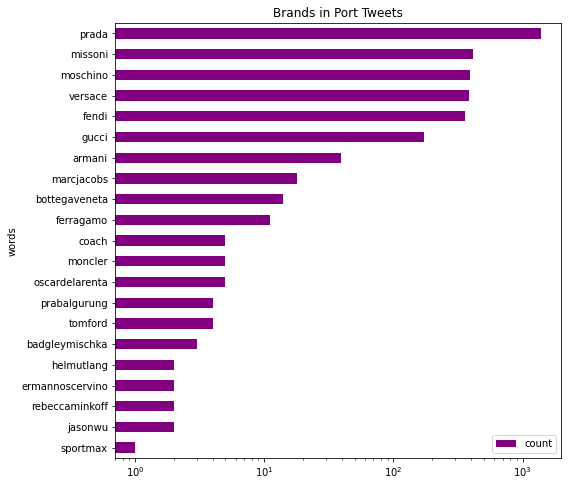

In [56]:
fig, ax = plt.subplots(figsize=(8, 8))

#horizontal bar graph
clean_port.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Brands in Port Tweets")
ax.set_xscale('log')

plt.show()

In [86]:
clean_thai.head()

words  count    lcount
9           prada  18931  9.848556
13          coach  12146  9.404755
190       moncler    555  6.318968
223  prabalgurung    386  5.955837
261         gucci    276  5.620401

In [125]:
#export for team use - Andrea makes Sunburst plot using this
clean_thai.to_csv('thai_brands.csv')
clean_korean.to_csv('korean_brands.csv')
clean_japanese.to_csv('japanese_brands.csv')
clean_italian.to_csv('italian_brands.csv')
clean_spanish.to_csv('spanish_brands.csv')
clean_english.to_csv('english_brands.csv')
clean_french.to_csv('french_brands.csv')
clean_port.to_csv('port_brands.csv')

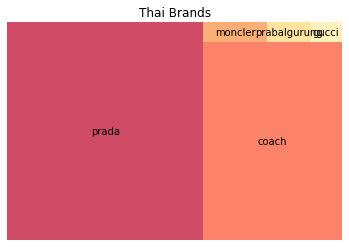

In [57]:
#treemap the most popular brands for each language
squarify.plot(sizes=clean_thai.iloc[:5, :]['count'], label=clean_thai.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('Thai Brands')
plt.show()

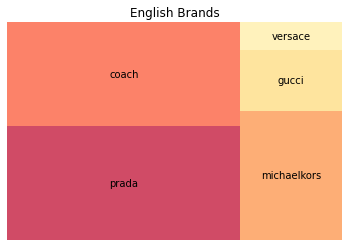

In [58]:
squarify.plot(sizes=clean_english.iloc[:5, :]['count'], label=clean_english.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('English Brands')
plt.show()

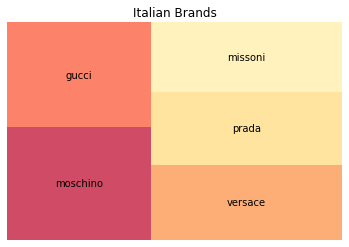

In [59]:
squarify.plot(sizes=clean_italian.iloc[:5, :]['count'], label=clean_italian.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('Italian Brands')
plt.show()

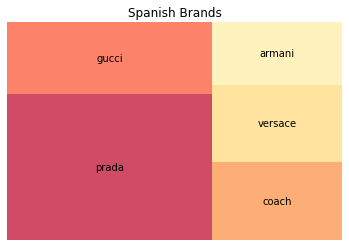

In [60]:
squarify.plot(sizes=clean_spanish.iloc[:5, :]['count'], label=clean_spanish.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('Spanish Brands')
plt.show()

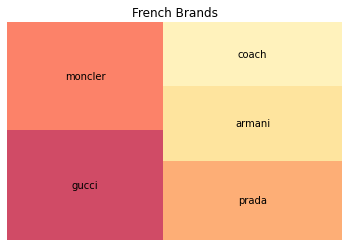

In [61]:
squarify.plot(sizes=clean_french.iloc[:5, :]['count'], label=clean_french.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('French Brands')
plt.show()

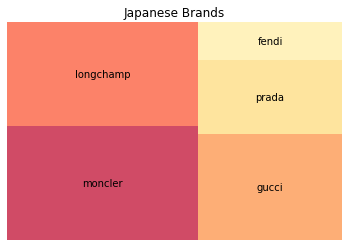

In [62]:
squarify.plot(sizes=clean_japanese.iloc[:5, :]['count'], label=clean_japanese.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('Japanese Brands')
plt.show()

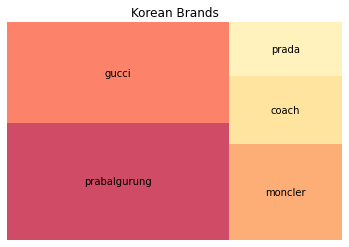

In [63]:
squarify.plot(sizes=clean_korean.iloc[:5, :]['count'], label=clean_korean.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('Korean Brands')
plt.show()

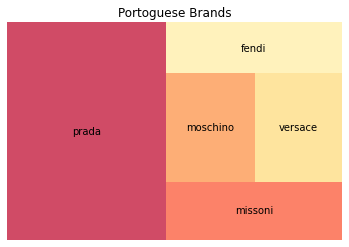

In [64]:
squarify.plot(sizes=clean_port.iloc[:5, :]['count'], label=clean_port.iloc[:5, :]['words'], alpha=.7, color=["#bd0026","#fc4e2a","#fd8d3c", "#fed976","#ffeda0"])
plt.axis('off')
plt.title('Portoguese Brands')
plt.show()

In [68]:
#all brands and languages concated to one file with the week for each brand
langtree = pd.read_csv('language_brands_work.csv')
langtree.head()

brand  count     lang    fw
0        prada  55056  english   mfw
1        coach  50121  english  nyfw
2  michaelkors  27175  english  nyfw
3        gucci  12859  english   mfw
4      versace   5823  english   mfw

In [69]:
#treemap weeks then lang then brand, english included
fig = px.treemap(langtree, path = ['fw', 'lang', 'brand'], values = 'count', width=900, height=800, title = 'Brands')
fig.show()

In [70]:
#treemap lang then weeks then brand, english included

fig = px.treemap(langtree, path = ['lang', 'fw', 'brand'], values = 'count', width=900, height=800, title = 'Brands')
fig.show()

In [74]:
#same data as before but exclude english
langtree3 = pd.read_csv('language_noeng_5.csv')

In [75]:
#treemap with week being outermost layer, languages then brands next

fig = px.treemap(langtree3, path = ['fw', 'lang', 'brand'], values = 'count', width=900, height=800, title = 'Brands', color = 'lang')
fig.show()

In [76]:
#treemap with lang being outermost layer, week then brand next next

fig = px.treemap(langtree3, path = ['lang', 'fw', 'brand'], values = 'count', width=1000, height=1000, title = 'Brands')
fig.show()
#fig.write_html("brnd2.html")

In [78]:
#treemap with brands being outermost layer, languages next
fig = px.treemap(langtree3, path = ['brand', 'lang'], values = 'count', width=1000, height=1000, title = 'Brands')
fig.show()
#fig.write_html("brnd3.html")

### Now we turn to the location of the tweets to support the language analysis, we do not have lat/long but just the location, i.e. Madrid, so we must geocode these in order to map them

In [79]:
#import geo packages
import geopandas as gpd
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
locator = Nominatim(user_agent="myGeocoder")
geocode = RateLimiter(locator.geocode, min_delay_seconds=0.1)

In [82]:
#only tweets that have location value
loctweets = twlangtot.dropna(subset = ["location"])

In [84]:
#seperate nyfw and mfw tweets since geoprocessing takes a long time
nyfwloc = loctweets[(loctweets['day'] < 14) & (loctweets['day'] > 3)]

In [85]:
mfwloc = loctweets[(loctweets['day'] < 26) & (loctweets['day'] > 16)]

In [86]:
#sample since geoprocessing took too long for big sets
mfwtest = mfwloc.sample(frac = 0.1, random_state = 1)

In [99]:
nyfwtest = nyfwloc.sample(frac = 0.1, random_state = 1)

In [126]:
nyfwloc.to_csv('nyfwloc.csv')
mfwloc.to_csv('mfwloc.csv')

In [88]:
#run once and export to csv to reupload for future, runtime > 8 hours
mfwtest['geolocation'] = mfwtest['location'].apply(geocode)
mfwtest['point'] = mfwtest['geolocation'].apply(lambda loc: tuple(loc.point) if loc else None)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('7/14/13',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
 

RateLimiter swallowed an error after 2 retries. Called with (*('7/14/13',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  Fi

RateLimiter caught an error, retrying (1/2 tries). Called with (*('4000:1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*('我的梦✨',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  Fi

RateLimiter swallowed an error after 2 retries. Called with (*('我的梦✨',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  File 

RateLimiter caught an error, retrying (1/2 tries). Called with (*('4000:1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*('1 AU',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  Fi

RateLimiter caught an error, retrying (0/2 tries). Called with (*('4000:1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  

RateLimiter swallowed an error after 2 retries. Called with (*('4000:1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  Fil

RateLimiter caught an error, retrying (1/2 tries). Called with (*('4000:1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*('𝑮𝑶𝑻7, 𝑿1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)


RateLimiter swallowed an error after 2 retries. Called with (*('𝑮𝑶𝑻7, 𝑿1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  F

RateLimiter caught an error, retrying (1/2 tries). Called with (*('In yr head',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b

RateLimiter caught an error, retrying (0/2 tries). Called with (*('C-Town, Mississippi',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.re

RateLimiter swallowed an error after 2 retries. Called with (*('C-Town, Mississippi',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_

RateLimiter caught an error, retrying (1/2 tries). Called with (*('Ituzaingó Centro, Argentina',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self.

RateLimiter caught an error, retrying (0/2 tries). Called with (*('4000:1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  

RateLimiter swallowed an error after 2 retries. Called with (*('4000:1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  Fil

RateLimiter caught an error, retrying (1/2 tries). Called with (*('4000:1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*('7/14/13',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
 

RateLimiter swallowed an error after 2 retries. Called with (*('7/14/13',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  Fi

RateLimiter caught an error, retrying (1/2 tries). Called with (*('127.0.0.1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('16/1/2014',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)

RateLimiter swallowed an error after 2 retries. Called with (*('16/1/2014',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  

RateLimiter caught an error, retrying (1/2 tries). Called with (*('4000:1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  

In [91]:
#convert geocoded tweets to a lat and long column
mfwtest[['latitude', 'longitude', 'altitude']] = pd.DataFrame(mfwtest['point'].tolist(), index=mfwtest.index)

In [93]:
#install mapping package
import folium
from folium.plugins import FastMarkerCluster

In [94]:
#get rid of any geocoding that did not work
mfwtest = mfwtest[pd.notnull(mfwtest["latitude"])]

In [101]:
mfwtest.to_csv('mfwgeo.csv')

### Repeat for NYFW sample

In [102]:
#run once and export to csv to reupload for future, runtime > 8 hours
nyfwtest['geolocation'] = nyfwtest['location'].apply(geocode)
nyfwtest['point'] = nyfwtest['geolocation'].apply(lambda loc: tuple(loc.point) if loc else None)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('California via Detroit',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock

RateLimiter swallowed an error after 2 retries. Called with (*('California via Detroit',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.re

RateLimiter caught an error, retrying (1/2 tries). Called with (*('11.11.19💗',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('10.08.19',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)


RateLimiter caught an error, retrying (0/2 tries). Called with (*('1/21/20💖🙏🏽',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b

RateLimiter swallowed an error after 2 retries. Called with (*('1/21/20💖🙏🏽',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
 

RateLimiter caught an error, retrying (0/2 tries). Called with (*('Miami th l',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 381, in _make_request
    self._validate_conn(conn)
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 976, in _validate_conn
    conn.connect()
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connection.py", line 370, in connect
    ssl_context=context,
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/util/ssl_.py", line 377, in ssl_wrap_socket
    return context.wrap_socket(sock, server_hostname=server_hostname)
  File "/Users/johnhughes/miniconda3/lib/python3.6/ssl.py", line 401, in wrap_socket
    _context=self, _session=session)
  File "/Users/johnhughes/miniconda3/lib/python3.6/ssl.py", line 808, in __init__
    self.do_handshake()
  File "/Users/johnhughes/miniconda3

RateLimiter caught an error, retrying (1/2 tries). Called with (*('7 0 2 ⭐',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
 

RateLimiter caught an error, retrying (1/2 tries). Called with (*('192.168.1.1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(

RateLimiter caught an error, retrying (0/2 tries). Called with (*('NY🍎 to AZ🌵',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b

RateLimiter swallowed an error after 2 retries. Called with (*('NY🍎 to AZ🌵',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
 

RateLimiter caught an error, retrying (0/2 tries). Called with (*('▲  NY/NC 🛩 Las Vegas',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.r

RateLimiter swallowed an error after 2 retries. Called with (*('▲  NY/NC 🛩 Las Vegas',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv

RateLimiter caught an error, retrying (1/2 tries). Called with (*('NJ-LA-NJ-NC',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(

RateLimiter caught an error, retrying (0/2 tries). Called with (*('•|i|• Ø i+! ].[',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_i

RateLimiter swallowed an error after 2 retries. Called with (*('•|i|• Ø i+! ].[',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into

RateLimiter caught an error, retrying (1/2 tries). Called with (*('11.9.19',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
 

RateLimiter caught an error, retrying (0/2 tries). Called with (*('10 on the floor',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_i

RateLimiter swallowed an error after 2 retries. Called with (*('10 on the floor',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into

RateLimiter caught an error, retrying (1/2 tries). Called with (*('New York, NY/ Los Angeles',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._s

RateLimiter caught an error, retrying (0/2 tries). Called with (*("BP's area",), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)

RateLimiter caught an error, retrying (0/2 tries). Called with (*('27/10/2019🇮🇹',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into

RateLimiter swallowed an error after 2 retries. Called with (*('27/10/2019🇮🇹',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)

RateLimiter caught an error, retrying (1/2 tries). Called with (*('예,태,강단',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  

RateLimiter caught an error, retrying (0/2 tries). Called with (*('✨🍊 1 9 9 4 🍊✨',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_int

RateLimiter swallowed an error after 2 retries. Called with (*('✨🍊 1 9 9 4 🍊✨',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b

RateLimiter caught an error, retrying (1/2 tries). Called with (*('•|i|• Ø i+! ].[',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_i

RateLimiter caught an error, retrying (0/2 tries). Called with (*('#Orange County., CA & #AZ',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._s

RateLimiter swallowed an error after 2 retries. Called with (*('#Orange County., CA & #AZ',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock

RateLimiter caught an error, retrying (1/2 tries). Called with (*('4000:1',), **{}).
Traceback (most recent call last):
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/Users/johnhughes/miniconda3/lib/python3.6/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 1331, in getresponse
    response.begin()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 297, in begin
    version, status, reason = self._read_status()
  File "/Users/johnhughes/miniconda3/lib/python3.6/http/client.py", line 258, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/Users/johnhughes/miniconda3/lib/python3.6/socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  

In [105]:
nyfwtest[['latitude', 'longitude', 'altitude']] = pd.DataFrame(nyfwtest['point'].tolist(), index=nyfwtest.index)

In [143]:
nyfwtest.to_csv('geonyfw.csv')

In [107]:
nyfwtest.latitude.isnull().sum()

6956

In [108]:
nyfwtest = nyfwtest[pd.notnull(nyfwtest["latitude"])]

In [110]:
nyfwtest.shape

(38383, 35)

In [118]:
#NYFW Heatmap
from folium.plugins import HeatMap
heat = folium.Map(location=[59.338315,18.089960],
                        zoom_start=4,
                        tiles='cartodbpositron')

nyfwtest['count'] = 1
HeatMap(data=nyfwtest[['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(heat)
heat

In [124]:
#MFW Heatmap
heatm = folium.Map(location=[59.338315,18.089960],
                        zoom_start=2,
                        tiles='cartodbpositron')

mfwtest['count'] = 1
HeatMap(data=mfwtest[['latitude', 'longitude', 'count']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(heatm)
heatm

In [149]:
nyfwtest.head()

id          time          created_at   from_user_name  \
441872   1.236755e+18  1.583700e+09 2020-03-08 20:47:05  boobspringsteen   
639771   1.227576e+18  1.581512e+09 2020-02-12 12:53:08       CostLittle   
1196853  1.236645e+18  1.583674e+09 2020-03-08 13:28:00      secondcycle   
1213179  1.237037e+18  1.583768e+09 2020-03-09 15:26:15   Lilythegreat31   
627008   1.227425e+18  1.581476e+09 2020-02-12 02:53:21      KellySaysx3   

                                                      text filter_level  \
441872   Mfw my friend says they’re dreading work today...          low   
639771   Flower Silk Polyester Charms Pendant Drop Earr...         none   
1196853  So good I had to share! Check out all the item...          low   
1213179  So good I had to share! Check out all the item...          low   
627008   RT @MEENAVOGUEE: RODARTE FALL 2020. #NYFW http...         none   

         possibly_sensitive  retweet_count  favorite_count lang  \
441872                  0.0            0.0             0.0   en   
639771                  0.0            0.0             0.0   en   
1196853                 0.0            0.0             0.0   en   
1213179                 0.0            0.0             0.0   en   
627008                  0.0          132.0             0.0   en   

                                                    source          location  \
441872   <a href="http://twitter.com/download/iphone" r...       Chicago, IL   
639771   <a href="https://socialrabbitplugin.com" rel="...            Canada   
1196853  <a href="http://poshmark.com/" rel="nofollow">...  Toronto, Ontario   
1213179  <a href="http://poshmark.com/" rel="nofollow">...      Pennsylvania   
627008   <a href="http://twitter.com/download/iphone" r...         Miami, FL   

         from_user_id        from_user_realname  from_user_verified  \
441872   9.355509e+17                thembo llc                 0.0   
639771   1.137332e+18               Cost Little                 0.0   
1196853  1.134797e+18  Second Cycle Threads Inc                 0.0   
1213179  9.467855e+17                      Lily                 0.0   
627008   2.822979e+08                    Daria.                 0.0   

                                     from_user_description  \
441872                                   Teddy they / them   
639771   Cost Little is an online store that focuses on...   
1196853  🇨🇦: Toronto Based Thrift Shop + #poshreseller ...   
1213179                                    Posh mark sales   
627008         Fashion. Makeup. Occasional Jokes.✨🖖🏻♓️⚜️🌞🌻   

                                from_user_url  \
441872                                    NaN   
639771                https://t.co/XL6CCeLn4M   
1196853  https://linktr.ee/secondcyclethreads   
1213179                                   NaN   
627008                https://t.co/XCnNquy8FX   

                               from_user_profile_image_url  \
441872   http://pbs.twimg.com/profile_images/1229077072...   
639771   http://pbs.twimg.com/profile_images/1188374389...   
1196853  http://pbs.twimg.com/profile_images/1134943999...   
1213179  http://pbs.twimg.com/profile_images/1119662514...   
627008   http://pbs.twimg.com/profile_images/1164730241...   

         from_user_tweetcount  from_user_followercount  from_user_friendcount  \
441872                 7066.0                    385.0                  464.0   
639771                  862.0                      3.0                    0.0   
1196853                 716.0                     68.0                  119.0   
1213179                1824.0                    296.0                 1850.0   
627008                34016.0                    319.0                  350.0   

         from_user_favourites_count  from_user_listed from_user_created_at  \
441872                      34236.0               0.0  2017-11-28 16:48:10   
639771                          0.0               0.0  2019-06-08 12:12:33   
1196853                        15.0   

In [150]:
geotweets = pd.concat([mfwtest, nyfwtest])

In [151]:
geotweets.to_csv('geotweets.csv')

In [152]:
mfwtest.to_csv('mfwtest.csv')

In [255]:
#combined map with filters

m = folium.Map(location=[0, 0], zoom_start=1)

mcg = folium.plugins.MarkerCluster(control=False)
m.add_child(mcg)

g1 = folium.plugins.FeatureGroupSubGroup(mcg, 'MFW')
m.add_child(g1)

g2 = folium.plugins.FeatureGroupSubGroup(mcg, 'NYFW')
m.add_child(g2)

FastMarkerCluster(data=list(zip(mfwtest['latitude'].values,  mfwtest['longitude'].values))).add_to(g1)
FastMarkerCluster(data=list(zip(nyfwtest['latitude'].values,  nyfwtest['longitude'].values))).add_to(g2)

folium.LayerControl(collapsed=False).add_to(m)
#m.save(os.path.join('results', 'Plugins_9.html'))
m
#m.save('FWmap.html')

In [285]:
#map for NYFW with custom mapbox styling for website


api = 'https://api.mapbox.com/styles/v1/hughesjohn96/ckcs84jjl1k1z1jpkwyl7q3z1/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1IjoiaHVnaGVzam9objk2IiwiYSI6ImNrNGJoNmJhdDBkaDYzZXA4YXBmN2x4eWsifQ.lo2EfJegtsa3ec9s3zqswA'

folium_mapny = folium.Map(location=[0,0],
                        zoom_start=1,
                        tiles = api,
                        attr='My data attribution',)


FastMarkerCluster(data=list(zip(nyfwtest['latitude'].values,  nyfwtest['longitude'].values))).add_to(folium_mapny)
folium.LayerControl().add_to(folium_mapny)
folium_mapny
folium_mapny.save('NYFWmapFinal.html')

In [286]:
#map for MIFW with custom mapbox styling for website

api = 'https://api.mapbox.com/styles/v1/hughesjohn96/ckcs84jjl1k1z1jpkwyl7q3z1/tiles/256/{z}/{x}/{y}@2x?access_token=pk.eyJ1IjoiaHVnaGVzam9objk2IiwiYSI6ImNrNGJoNmJhdDBkaDYzZXA4YXBmN2x4eWsifQ.lo2EfJegtsa3ec9s3zqswA'

folium_mapmi = folium.Map(location=[0,0],
                        zoom_start=1,
                        tiles = api,
                        attr='My data attribution',)


FastMarkerCluster(data=list(zip(mfwtest['latitude'].values,  mfwtest['longitude'].values))).add_to(folium_mapmi)
folium.LayerControl().add_to(folium_mapmi)
folium_mapmi
folium_mapmi.save('MIFWmapFinal.html')